In [1]:
import pandas as pd
import numpy as np
import scikit_posthocs as sp
import pingouin as pg
import seaborn as sns
# import gtfparse as gp
# import gzip
# import itertools
# import subprocess
# from multiprocessing import Pool
import os
import time
import itertools
# import warnings
from scipy.stats import chi2_contingency, fisher_exact, f_oneway, tukey_hsd, kruskal, dunnett


In [2]:
import sys
sys.path.append('/mnt/d/GoTx_Folder/src')
# from a2ihelper import call_reditools, 
import a2ihelper as a2i

# Valeri data

## First step is get genes posisiotns to run reditools
it can be done with the function get_genes_positions()

In [3]:
genes = ['Clec1a','Clec2g','Clec4a4','Clec4e','Csf3r','Cyp4f16','Dscam',
         'Gm8774','H2bc27','Hap1','Hdc','Hebp1','Ier2','Igkv6-23','Kdm6b',
         'Klri1','Marchf3','Mthfs','Ncr1','Notch1','Per1','Ptchd1','Rnf144a',
         'Sgms2','Stra6l','Xylt1','I830077J02Rik','Tlr1','Axl','C1qc','Cebpb',
         'Il1b','Nfkbiz','B2m','Apol10a','Cd74','Ndnf','Pcp4','Pvalb']

path_ref_annotation='/mnt/e/reference_files/gencode.vM10.annotation.gtf'
bams_path = '/mnt/d/rna_editing/bams/'

In [4]:
# genes = ['Clec1a','Clec2g','Clec4a4','Clec4e']
# genes_positions_list = []
# gens_aux = []
# gzip_file = False
# get_gene = False
# chr = ''
# start_gene = ''
# end_gene = ''

#     if genes:
#         if gzip_file:
#             # for g in genes:
#             with gzip.open(path_ref_annotation,'r') as f_gtf:
#                 for line in f_gtf:
#                     if not line.startswith('#'.encode()):
#                         l = line.decode().split('\t')
#                         dict_g = { i.split(' ')[0]:i.split(' ')[1] for i in [j.strip() for j in l[-1].replace(';\n','').replace('"','').split(';')] }
#                         if (l[2]=='gene') and (dict_g['gene_name'] in genes):
#                             chr = l[0]
#                             start_gene = l[3]
#                             end_gene = l[4]
#                             get_gene = True                        
#                             # gens_aux.append( dict_g['gene_name'] )
#                         elif (get_gene) and (l[2]=='start_codon'):
#                             start_codon = l[3]
#                             gens_aux.append( dict_g['gene_name']+'_5UTR' )
#                             if start_gene != start_codon:
#                                 genes_positions_list.append(chr+':'+start_gene+'-'+str(int(start_codon)-1))
#                             else:
#                                 genes_positions_list.append(chr+':'+start_gene+'-'+start_codon)
#                         elif (get_gene) and (l[2]=='stop_codon'):
#                             stop_codon = l[4]
#                             gens_aux.append( dict_g['gene_name']+'_3UTR' )
#                             if end_gene != stop_codon:
#                                 genes_positions_list.append(chr+':'+str(int(stop_codon)+1)+'-'+end_gene)
#                             else:
#                                 genes_positions_list.append(chr+':'+stop_codon+'-'+end_gene)
#                             get_gene = False #control for get start and stop codon after gotten gene
#         else:
#             # for g in genes:
#             with open(path_ref_annotation,'r') as f_gtf:
#                 for line in f_gtf:
#                     if not line.startswith('#'):
#                         l = line.split('\t')
#                         dict_g = { i.split(' ')[0]:i.split(' ')[1] for i in [j.strip() for j in l[-1].replace(';\n','').replace('"','').split(';')] }                    
#                         if (l[2]=='gene') and (dict_g['gene_name'] in genes):
#                             chr = l[0]
#                             start_gene = l[3]
#                             end_gene = l[4]
#                             get_gene = True                        
#                             # gens_aux.append( dict_g['gene_name'] )
#                         elif (get_gene) and (l[2]=='start_codon'):
#                             start_codon = l[3]
#                             gens_aux.append( dict_g['gene_name']+'_5UTR' )
#                             if start_gene != start_codon:
#                                 genes_positions_list.append(chr+':'+start_gene+'-'+str(int(start_codon)-1))
#                             else:
#                                 genes_positions_list.append(chr+':'+start_gene+'-'+start_codon)
#                         elif (get_gene) and (l[2]=='stop_codon'):
#                             stop_codon = l[4]
#                             gens_aux.append( dict_g['gene_name']+'_3UTR' )
#                             if end_gene != stop_codon:
#                                 genes_positions_list.append(chr+':'+str(int(stop_codon)+1)+'-'+end_gene)
#                             else:
#                                 genes_positions_list.append(chr+':'+stop_codon+'-'+end_gene)
#                             get_gene = False #control for get start and stop codon after gotten gene

In [4]:
# t1 = time.time()
# gene_coord = a2i.call_reditools2.get_genes_positions(genes, path_ref_annotation, gzip_file=False)
# gene_coord
# print(np.round( (time.time()-t1), 6 ), np.round( (time.time()-t1)/60, 2 ))

In [5]:
# t1 = time.time()
# utr_gene_coord = a2i.call_reditools2.get_utr_genes_positions(genes, path_ref_annotation, gzip_file=False)
# utr_gene_coord
# print(np.round( (time.time()-t1), 6 ), np.round( (time.time()-t1)/60, 2 ))

15.894659 0.26


In [7]:
utr_gene_coord = {'Notch1_5UTR': 'chr2:26457903-26503555',
 'Notch1_3UTR': 'chr2:26459534-26516663',
 'B2m_5UTR': 'chr2:122147686-122147737',
 'B2m_3UTR': 'chr2:122151661-122153083',
 'Hdc_5UTR': 'chr2:126593667-126618566',
 'Hdc_3UTR': 'chr2:126593964-126619299',
 'Il1b_5UTR': 'chr2:129364570-129370327',
 'Il1b_3UTR': 'chr2:129365032-129371139',
 'Cebpb_5UTR': 'chr2:167688915-167689021',
 'Cebpb_3UTR': 'chr2:167689913-167690418',
 'I830077J02Rik_5UTR': 'chr3:105924358-105928767',
 'I830077J02Rik_3UTR': 'chr3:105926443-105932664',
 'Sgms2_5UTR': 'chr3:131318985-131342220',
 'Sgms2_3UTR': 'chr3:131323110-131491411',
 'Stra6l_5UTR': 'chr4:45848664-45849077',
 'Stra6l_3UTR': 'chr4:45885400-45887008',
 'Csf3r_5UTR': 'chr4:126024550-126027336',
 'Csf3r_3UTR': 'chr4:126043839-126044440',
 'C1qc_5UTR': 'chr4:136889804-136892559',
 'C1qc_3UTR': 'chr4:136890046-136893065',
 'Tlr1_5UTR': 'chr5:64924679-64927229',
 'Tlr1_3UTR': 'chr5:64924848-64933563',
 'Ndnf_5UTR': 'chr6:65671590-65696039',
 'Ndnf_3UTR': 'chr6:65704446-65712326',
 'Igkv6-23_5UTR': 'chr6:70260409-70260930',
 'Igkv8-21_5UTR': 'chr6:70260409-70315449',
 'Igkv6-20_5UTR': 'chr6:70260409-70336476',
 'Igkv8-19_5UTR': 'chr6:70260409-70341445',
 'Igkv8-18_5UTR': 'chr6:70260409-70355876',
 'Igkv6-17_5UTR': 'chr6:70260409-70371468',
 'Igkv8-16_5UTR': 'chr6:70260409-70387235',
 'Igkv6-15_5UTR': 'chr6:70260409-70406989',
 'Igkv6-14_5UTR': 'chr6:70260409-70435473',
 'Igkv6-13_5UTR': 'chr6:70260409-70458033',
 'Igkv3-12_5UTR': 'chr6:70260409-70518249',
 'Igkv3-10_5UTR': 'chr6:70260409-70572632',
 'Igkv3-9_5UTR': 'chr6:70260409-70588188',
 'Igkv3-7_5UTR': 'chr6:70260409-70607436',
 'Igkv3-5_5UTR': 'chr6:70260409-70663297',
 'Igkv3-4_5UTR': 'chr6:70260409-70671788',
 'Igkv3-3_5UTR': 'chr6:70260409-70686945',
 'Igkv3-2_5UTR': 'chr6:70260409-70698467',
 'Igkv3-1_5UTR': 'chr6:70260409-70703577',
 'Igkc_3UTR': 'chr6:70726758-70260955',
 'Clec4a4_5UTR': 'chr6:122990367-122990367',
 'Clec4a4_3UTR': 'chr6:123024041-123024105',
 'Clec4e_5UTR': 'chr6:123281789-123289745',
 'Clec4e_3UTR': 'chr6:123283543-123289870',
 'Clec2i_5UTR': 'chr6:128883852-128887634',
 'Clec2i_3UTR': 'chr6:128896551-128884543',
 'Clec2g_5UTR': 'chr6:128934381-128934416',
 'Clec2g_3UTR': 'chr6:128983088-128984707',
 'Clec1a_5UTR': 'chr6:129424772-129451712',
 'Clec1a_3UTR': 'chr6:129428997-129452000',
 'Klri1_5UTR': 'chr6:129697218-129717119',
 'Klri1_3UTR': 'chr6:129697302-129717132',
 'Hebp1_5UTR': 'chr6:135137522-135168094',
 'Hebp1_3UTR': 'chr6:135137892-135198022',
 'Ncr1_5UTR': 'chr7:4337724-4337748',
 'Ncr1_3UTR': 'chr7:4344705-4345164',
 'Axl_5UTR': 'chr7:25757273-25788475',
 'Axl_3UTR': 'chr7:25758665-25788705',
 'Xylt1_5UTR': 'chr7:117380979-117381178',
 'Xylt1_3UTR': 'chr7:117667623-117673580',
 'Ier2_5UTR': 'chr8:84661331-84662748',
 'Ier2_3UTR': 'chr8:84662089-84662852',
 'Mthfs_5UTR': 'chr9:89210676-89211194',
 'Mthfs_3UTR': 'chr9:89226179-89377713',
 'Per1_5UTR': 'chr11:69095217-69100641',
 'Per1_3UTR': 'chr11:69105656-69109960',
 'Kdm6b_5UTR': 'chr11:69398508-69408159',
 'Kdm6b_3UTR': 'chr11:69399829-69413675',
 'Hap1_5UTR': 'chr11:100347327-100356074',
 'Hap1_3UTR': 'chr11:100348708-100356128',
 'Rnf144a_5UTR': 'chr12:26306797-26339437',
 'Rnf144a_3UTR': 'chr12:26310661-26415256',
 'Apol10a_5UTR': 'chr15:77477047-77481259',
 'Apol10a_3UTR': 'chr15:77489123-77491069',
 'Pvalb_5UTR': 'chr15:78191114-78204142',
 'Pvalb_3UTR': 'chr15:78191669-78206400',
 'Nfkbiz_5UTR': 'chr16:55811375-55822050',
 'Nfkbiz_3UTR': 'chr16:55812733-55838899',
 'Pcp4_5UTR': 'chr16:96467606-96467781',
 'Pcp4_3UTR': 'chr16:96525518-96525793',
 'Dscam_5UTR': 'chr16:96592079-97170273',
 'Dscam_3UTR': 'chr16:96593062-97170752',
 'Cyp4f16_5UTR': 'chr17:32536558-32536998',
 'Cyp4f16_3UTR': 'chr17:32551234-32551798',
 'Cd74_5UTR': 'chr18:60803848-60803933',
 'Cd74_3UTR': 'chr18:60812163-60812646',
 'Ptchd1_5UTR': 'chrX:155573455-155623307',
 'Ptchd1_3UTR': 'chrX:155573544-155623814'}

In [9]:
gene_coord = {'Notch1': 'chr2:26457903-26516663',
 'B2m': 'chr2:122147686-122153083',
 'Hdc': 'chr2:126593667-126619299',
 'Il1b': 'chr2:129364570-129371139',
 'Cebpb': 'chr2:167688915-167690418',
 'I830077J02Rik': 'chr3:105924358-105932664',
 'Sgms2': 'chr3:131318985-131491411',
 'Stra6l': 'chr4:45848664-45887008',
 'Csf3r': 'chr4:126024550-126044440',
 'C1qc': 'chr4:136889804-136893065',
 'Tlr1': 'chr5:64924679-64933563',
 'Ndnf': 'chr6:65671590-65712326',
 'Igkv6-23': 'chr6:70260409-70260955',
 'Clec4a4': 'chr6:122990367-123024105',
 'Clec4e': 'chr6:123281789-123289870',
 'Gm8774': 'chr6:128883852-128884543',
 'Clec2g': 'chr6:128934381-128984707',
 'Clec1a': 'chr6:129424772-129452000',
 'Klri1': 'chr6:129697218-129717132',
 'Hebp1': 'chr6:135137522-135198022',
 'Ncr1': 'chr7:4337724-4345164',
 'Axl': 'chr7:25757273-25788705',
 'Xylt1': 'chr7:117380979-117673580',
 'Ier2': 'chr8:84661331-84662852',
 'Mthfs': 'chr9:89210676-89377713',
 'Per1': 'chr11:69095217-69109960',
 'Kdm6b': 'chr11:69398508-69413675',
 'Hap1': 'chr11:100347327-100356128',
 'Rnf144a': 'chr12:26306797-26415256',
 'Apol10a': 'chr15:77477047-77491069',
 'Pvalb': 'chr15:78191114-78206400',
 'Nfkbiz': 'chr16:55811375-55838899',
 'Pcp4': 'chr16:96467606-96525793',
 'Dscam': 'chr16:96592079-97170752',
 'Cyp4f16': 'chr17:32536558-32551798',
 'Cd74': 'chr18:60803848-60812646',
 'Ptchd1': 'chrX:155573455-155623814'}

## Call REDITOOLS for all bams

In [10]:
# genes_positions = gene_coord.values()
# in_bam_file_list = ['/mnt/d/rna_editing/bams/'+f for f in os.listdir('/mnt/d/rna_editing/bams/') if f.endswith('bam')]
# path_out_res = '/mnt/d/rna_editing/a2i_helper_output/res/'
# ref_genome_file = '/mnt/d/reference_files/mus_musculus/GRCm39.genome.fa'#'/mnt/e/reference_files/GRCm38.p4.genome.fa'
# path_reditools = '/mnt/d/reditools2.0/src/cineca/'
# reditools_options = '--strict'

In [7]:
# t1 = time.time()
# time_list = []
# for in_bam_file in in_bam_file_list:
#     time_list.append(time.time())
#     a2i.call_reditools2.run_per_gene_position_list(genes_positions, in_bam_file, path_out_res, ref_genome_file, path_reditools, reditools_options='', n_jobs=10)
#     time_list[-1] = time.time() - time_list[-1]
#     print('#',end=' ')
# print(np.round( (time.time()-t1), 6 ),'s', np.round( (time.time()-t1)/60, 2 ),'min')

In [8]:
# pd.DataFrame(list(zip(in_bam_file_list,time_list)), columns=['file','time(s)']).to_csv('/mnt/d/rna_editing/a2i_helper_output/processing_analysis/time_consumption_per_bam.csv', index=False)

In [12]:
genes_positions = utr_gene_coord.values()
in_bam_file_list = ['/mnt/d/rna_editing/bams/'+f for f in os.listdir('/mnt/d/rna_editing/bams/') if f.endswith('bam')]
path_out_res = '/mnt/d/rna_editing/a2i_helper_output/res_utr/'
ref_genome_file = '/mnt/d/reference_files/mus_musculus/GRCm39.genome.fa'#'/mnt/e/reference_files/GRCm38.p4.genome.fa'
path_reditools = '/mnt/d/reditools2.0/src/cineca/'
reditools_options = '--strict'

In [ ]:
t1 = time.time()
time_list = []
for in_bam_file in in_bam_file_list:
    time_list.append(time.time())
    a2i.call_reditools2.run_per_gene_position_list(genes_positions, in_bam_file, path_out_res, ref_genome_file, path_reditools, reditools_options='', n_jobs=10)
    time_list[-1] = time.time() - time_list[-1]
    print('#',end=' ')
print(np.round( (time.time()-t1), 6 ),'s', np.round( (time.time()-t1)/60, 2 ),'min')

## Prepair metadata

In [9]:
pd.read_csv('/mnt/d/rna_editing/metadata.txt')

,sample,type
0,X582-ready.bam,control
1,X679-ready.bam,control
2,X868-ready.bam,control
3,X1247-ready.bam,7d
4,X1249-ready.bam,7d
5,X36-ready.bam,7d
6,X838-ready.bam,14d
7,X839-ready.bam,14d
8,X840-ready.bam,14d


In [10]:
path = '/mnt/d/rna_editing/a2i_helper_output/res/'
meta = pd.DataFrame(os.listdir(path))
meta.columns = ['file_name']
meta[['sample','coord']] = meta.file_name.str.split('_', n=1, expand=True)
meta['coord'] = meta.coord.str.replace('_RES.tsv','')
meta['coord'] = meta.coord.str.replace('_',':', n=1)
meta['coord'] = meta.coord.str.replace('_','-')
meta['region'] = meta['coord'].map({value:key for key,value in gene_coord.items()})
meta['file_name'] = path+meta.file_name

meta = meta.merge(pd.read_csv('/mnt/d/rna_editing/metadata.txt'), on='sample')

meta = meta[['file_name', 'sample', 'region', 'type', 'coord']]
meta

,file_name,sample,region,type,coord
0,/mnt/d/rna_editing/a2i_helper_output/res/X1247...,X1247-ready.bam,Hap1,7d,chr11:100347327-100356128
1,/mnt/d/rna_editing/a2i_helper_output/res/X1247...,X1247-ready.bam,Per1,7d,chr11:69095217-69109960
2,/mnt/d/rna_editing/a2i_helper_output/res/X1247...,X1247-ready.bam,Kdm6b,7d,chr11:69398508-69413675
3,/mnt/d/rna_editing/a2i_helper_output/res/X1247...,X1247-ready.bam,Rnf144a,7d,chr12:26306797-26415256
4,/mnt/d/rna_editing/a2i_helper_output/res/X1247...,X1247-ready.bam,Apol10a,7d,chr15:77477047-77491069
...,...,...,...,...,...
328,/mnt/d/rna_editing/a2i_helper_output/res/X868-...,X868-ready.bam,Axl,control,chr7:25757273-25788705
329,/mnt/d/rna_editing/a2i_helper_output/res/X868-...,X868-ready.bam,Ncr1,control,chr7:4337724-4345164
330,/mnt/d/rna_editing/a2i_helper_output/res/X868-...,X868-ready.bam,Ier2,control,chr8:84661331-84662852
331,/mnt/d/rna_editing/a2i_helper_output/res/X868-...,X868-ready.bam,Mthfs,control,chr9:89210676-89377713


## Analize ONE region

In [11]:
df, df_a, df_g = a2i.editing.merge_files_one_region(meta[meta.region=='Ier2'])#Cebpb

In [12]:
df

,84661333,84661341,84661342,84661358,84661359,84661363,84661380,84661381,84661390,84661399,...,84662569,84662643,84662653,84662669,84662758,84662770,84662813,84662814,region,type
X1247-ready.bam,100.0,100.000000,99.629630,100.000000,100.0,100.000000,100.0,0.562324,100.000000,100.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Ier2,7d
X1249-ready.bam,100.0,100.000000,100.000000,100.000000,NaN,100.000000,100.0,0.402477,100.000000,100.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Ier2,7d
X36-ready.bam,100.0,100.000000,100.000000,100.000000,NaN,100.000000,100.0,1.417214,100.000000,100.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Ier2,7d
X582-ready.bam,100.0,99.863388,100.000000,99.979123,50.0,99.984809,100.0,0.121766,100.000000,99.991223,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Ier2,control
X679-ready.bam,100.0,99.541705,99.630693,100.000000,NaN,100.000000,100.0,0.882797,100.000000,100.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Ier2,control
X838-ready.bam,100.0,100.000000,100.000000,100.000000,NaN,100.000000,100.0,NaN,100.000000,100.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Ier2,14d
X839-ready.bam,100.0,100.000000,100.000000,100.000000,NaN,100.000000,100.0,2.734375,100.000000,100.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Ier2,14d
X840-ready.bam,100.0,99.411765,100.000000,100.000000,NaN,99.922601,100.0,0.154799,100.000000,100.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Ier2,14d
X868-ready.bam,100.0,99.929553,99.937087,100.000000,NaN,100.000000,100.0,0.621493,99.974568,100.000000,...,0.00684,66.666667,33.333333,75.0,100.0,50.0,0.029176,100.0,Ier2,control


In [13]:
df = a2i.editing.filter_positions(df, nan_filter=True, nan_filter_limit=1,
                                           zero_filter=False, zero_filter_limit=1,
                                           hundred_filter=True, hundred_filter_limit=1)
# df.copy() in case you don't want to change the original data

In [14]:
df

,84661381,84661609,84661641,84661666,84661735,84661838,84661841,84661857,84661915,84661998,...,84662274,84662312,84662355,84662465,84662532,84661540,84661986,84662431,region,type
X1247-ready.bam,0.562324,0.052687,0.027488,100.000000,99.820547,99.901137,0.371402,0.146897,0.095147,99.906455,...,99.962128,0.052425,99.851808,100.000000,99.935505,NaN,NaN,NaN,Ier2,7d
X1249-ready.bam,0.402477,0.019348,0.010088,49.259102,99.781079,99.821689,0.321839,0.217260,0.326076,100.000000,...,99.979524,0.100650,99.830759,99.936245,99.928969,0.163666,0.016741,0.042868,Ier2,7d
X36-ready.bam,1.417214,NaN,0.081070,54.617647,99.956924,99.366922,0.148331,0.494951,NaN,99.987005,...,99.992270,0.032595,100.000000,99.947132,100.000000,0.047304,0.089183,0.160085,Ier2,7d
X582-ready.bam,0.121766,0.007241,0.065222,48.117487,99.935298,99.880307,0.581007,0.114203,0.268345,99.982919,...,99.995363,0.060033,99.893928,99.968473,99.982100,0.065690,0.006786,0.023677,Ier2,control
X679-ready.bam,0.882797,0.003956,0.004084,48.406349,99.981166,99.848046,0.170579,0.156376,0.256076,99.919623,...,99.994671,0.025263,99.877345,99.991049,99.945882,0.127065,0.010927,0.031352,Ier2,control
X838-ready.bam,NaN,0.288392,NaN,44.830308,100.000000,99.557522,NaN,0.091912,NaN,100.000000,...,100.000000,0.271003,100.000000,99.573379,100.000000,NaN,NaN,0.175901,Ier2,14d
X839-ready.bam,2.734375,0.057438,0.172117,98.882682,99.816345,99.555556,0.201410,0.085837,0.691244,99.895833,...,99.846449,0.054054,99.608764,100.000000,99.860335,0.426439,0.105485,0.407609,Ier2,14d
X840-ready.bam,0.154799,NaN,0.036657,49.494949,99.895888,99.912841,0.504202,0.486295,0.310740,99.969586,...,99.906213,0.141066,99.864682,99.962784,99.898785,0.098232,0.030017,0.093721,Ier2,14d
X868-ready.bam,0.621493,0.005366,0.019002,48.776254,99.957067,99.732428,0.242322,0.279851,0.373512,99.990045,...,99.994500,0.032649,99.879158,99.979031,99.996647,0.193818,NaN,0.165693,Ier2,control


In [15]:
df_a[df.columns]

,84661381,84661609,84661641,84661666,84661735,84661838,84661841,84661857,84661915,84661998,...,84662274,84662312,84662355,84662465,84662532,84661540,84661986,84662431,region,type
X1247-ready.bam,1061.0,3794.0,3637.0,0.0,4.0,2.0,2146.0,2719.0,3150.0,4.0,...,2.0,3813.0,5.0,0.0,2.0,NaN,NaN,NaN,Ier2,7d
X1249-ready.bam,3217.0,10335.0,9912.0,4794.0,14.0,11.0,6504.0,8267.0,9476.0,0.0,...,3.0,10918.0,16.0,6.0,6.0,5490.0,11945.0,9327.0,Ier2,7d
X36-ready.bam,2852.0,NaN,7395.0,3086.0,2.0,24.0,4039.0,5026.0,NaN,1.0,...,1.0,9201.0,0.0,4.0,0.0,4226.0,7842.0,7484.0,Ier2,7d
X582-ready.bam,9843.0,27617.0,27580.0,13725.0,11.0,17.0,14887.0,19242.0,21556.0,5.0,...,2.0,31630.0,25.0,8.0,4.0,15213.0,29472.0,25335.0,Ier2,control
X679-ready.bam,8533.0,25278.0,24484.0,11930.0,3.0,21.0,14631.0,18516.0,20644.0,22.0,...,2.0,27701.0,27.0,2.0,11.0,13362.0,27451.0,22320.0,Ier2,control
X838-ready.bam,NaN,1383.0,NaN,699.0,0.0,4.0,NaN,1087.0,NaN,0.0,...,0.0,1472.0,0.0,5.0,0.0,NaN,NaN,1135.0,Ier2,14d
X839-ready.bam,498.0,1740.0,1740.0,18.0,2.0,4.0,991.0,1164.0,1293.0,2.0,...,4.0,1849.0,5.0,0.0,2.0,934.0,1894.0,1466.0,Ier2,14d
X840-ready.bam,1935.0,NaN,5454.0,2650.0,4.0,3.0,3552.0,4502.0,5133.0,2.0,...,8.0,6371.0,7.0,2.0,5.0,3051.0,6661.0,5330.0,Ier2,14d
X868-ready.bam,11513.0,37269.0,36832.0,17999.0,10.0,52.0,20172.0,25656.0,28540.0,4.0,...,3.0,39804.0,38.0,7.0,1.0,19568.0,NaN,33139.0,Ier2,control


In [16]:
df_g[df.columns]

,84661381,84661609,84661641,84661666,84661735,84661838,84661841,84661857,84661915,84661998,...,84662274,84662312,84662355,84662465,84662532,84661540,84661986,84662431,region,type
X1247-ready.bam,6.0,2.0,1.0,3406.0,2225.0,2021.0,8.0,4.0,3.0,4272.0,...,5279.0,2.0,3369.0,3461.0,3099.0,NaN,NaN,NaN,Ier2,7d
X1249-ready.bam,13.0,2.0,1.0,4654.0,6381.0,6158.0,21.0,18.0,31.0,11844.0,...,14648.0,11.0,9438.0,9405.0,8441.0,9.0,2.0,4.0,Ier2,7d
X36-ready.bam,41.0,NaN,6.0,3714.0,4641.0,3767.0,6.0,25.0,NaN,7694.0,...,12936.0,3.0,5837.0,7562.0,7121.0,2.0,7.0,12.0,Ier2,7d
X582-ready.bam,12.0,2.0,18.0,12729.0,16990.0,14186.0,87.0,22.0,58.0,29268.0,...,43132.0,19.0,23544.0,25367.0,22342.0,10.0,2.0,6.0,Ier2,control
X679-ready.bam,76.0,1.0,1.0,11193.0,15926.0,13799.0,25.0,29.0,53.0,27349.0,...,37525.0,7.0,21986.0,22341.0,20315.0,17.0,3.0,7.0,Ier2,control
X838-ready.bam,NaN,4.0,NaN,568.0,918.0,900.0,NaN,1.0,NaN,1548.0,...,1938.0,4.0,1137.0,1167.0,1085.0,NaN,NaN,2.0,Ier2,14d
X839-ready.bam,14.0,1.0,3.0,1593.0,1087.0,896.0,2.0,1.0,9.0,1918.0,...,2601.0,1.0,1273.0,1460.0,1430.0,4.0,2.0,6.0,Ier2,14d
X840-ready.bam,3.0,NaN,2.0,2597.0,3838.0,3439.0,18.0,22.0,16.0,6574.0,...,8522.0,9.0,5166.0,5372.0,4935.0,3.0,2.0,5.0,Ier2,14d
X868-ready.bam,72.0,2.0,7.0,17139.0,23282.0,19382.0,49.0,72.0,107.0,40178.0,...,54542.0,13.0,31408.0,33376.0,29822.0,38.0,NaN,55.0,Ier2,control


## Statistics for frequency

### Anova tukey

In [17]:
df_pv = a2i.editing.anova_tukey_test(df, only_pvalue=True, pvalue_filter_limit_anova=1, pvalue_filter_limit_tukey=1, return_only_significant=True)
df_pv

coord,84661666,84661735,84661838,84661857,84661998,84662016,84662130,84662169,84662184,84662187,84662193,84662215,84662274,84662312,84662355,84662465,84662532
tests,,,,,,,,,,,,,,,,,
"(7d, 14d)",0.981494,0.704865,0.991505,0.896214,0.969414,0.99834,0.496055,0.042039,0.554703,0.997762,0.844251,0.273844,0.306593,0.277374,0.786165,0.588304,0.680285
"(7d, control)",0.596636,0.286075,0.759352,0.765663,0.99997,0.934003,0.978548,0.98216,0.931425,0.928006,0.992594,0.948906,0.89461,0.911826,0.994101,0.985454,0.876986
"(control, 14d)",0.700939,0.681784,0.68946,0.963063,0.97125,0.91325,0.603462,0.052478,0.376824,0.902885,0.89789,0.394718,0.174617,0.165646,0.84003,0.500347,0.41793


### Kruskal Dunn

In [18]:
df_pv = a2i.editing.kruskal_dunn_test(df, only_pvalue=True, pvalue_filter_limit_kruskal=1, pvalue_filter_limit_dunn=1, return_only_significant=True)
df_pv

coord,84661666,84661735,84661838,84661857,84661998,84662016,84662130,84662169,84662184,84662187,84662193,84662215,84662274,84662312,84662355,84662465,84662532
tests,,,,,,,,,,,,,,,,,
"(7d, 14d)",0.371093,0.456057,1.0,0.233038,0.653368,0.881004,0.456057,0.036888,0.549316,0.881497,1.0,0.369091,1.0,0.179712,1.0,1.0,0.549316
"(7d, control)",0.073638,0.136037,0.654721,0.550985,0.822334,0.708225,0.550985,0.881497,0.708225,0.765594,1.0,0.822334,0.179712,0.654721,0.500545,0.500545,0.708225
"(control, 14d)",0.371093,0.456057,0.654721,0.550985,0.822334,0.600322,0.881497,0.052632,0.330541,0.881497,1.0,0.500545,0.179712,0.073638,0.500545,0.500545,0.330541


## Statistics for porprotions

### Pooling smaples/coordinates by G-test

In [19]:
a, g = a2i.editing.pool_positions(df_a[df.columns],df_g[df.columns])

In [20]:
a

,84662169,84662274,84662312,region,type
type,,,,,
14d,4.0,12.0,9692.0,Ier2,14d
7d,42.0,6.0,23932.0,Ier2,7d
control,156.0,7.0,99135.0,Ier2,control


In [21]:
g

,84662169,84662274,84662312,region,type
type,,,,,
14d,8909.0,13061.0,14.0,Ier2,14d
7d,21479.0,32863.0,16.0,Ier2,7d
control,86280.0,135199.0,39.0,Ier2,control


In [22]:
chi = a2i.editing.chi2_test(a,g,only_pvalue=True,pvalue_filter_limit=.05)
chi

,84662169,84662274,84662312,region,type
pvalue,0.001563,2.372066e-08,0.000568,Ier2,14d_vs_7d_vs_control


In [23]:
chi.columns

Index([84662169, 84662274, 84662312, 'region', 'type'], dtype='object')

In [24]:
a.loc[a.type!='7d',chi.columns]

,84662169,84662274,84662312,region,type
type,,,,,
14d,4.0,12.0,9692.0,Ier2,14d
control,156.0,7.0,99135.0,Ier2,control


In [25]:
fis = a2i.editing.fisher_test(a.loc[a.type!='7d',:],g.loc[g.type!='7d',:],only_pvalue=True,pvalue_filter_limit=.05)
fis

,84662169,84662274,84662312,region,type
pvalue,0.000989,6.116028e-09,0.000167,Ier2,14d_vs_control


In [26]:
or_ = a2i.editing.odds_r(a.loc[a.type!='7d',fis.columns], g.loc[g.type!='7d',fis.columns])
or_

,84662169,84662274,84662312,region,type
odds_ratio,0.248325,17.744364,0.272353,Ier2,14d_vs_control


<Axes: title={'center': '14d_vs_control (Ier2)'}, xlabel='Positions', ylabel='-log10(pvalue)'>

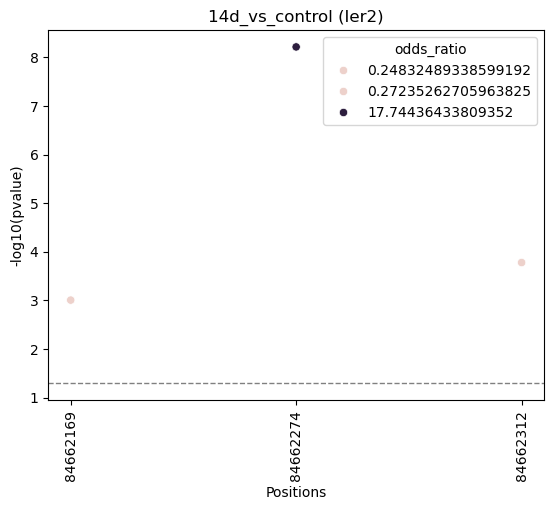

In [29]:
a2i.plot.manhattanplot(or_, fis, p_value_line=0.05)

<Axes: title={'center': 'Ier2'}, xlabel='Positions', ylabel='Editing Frequencies'>

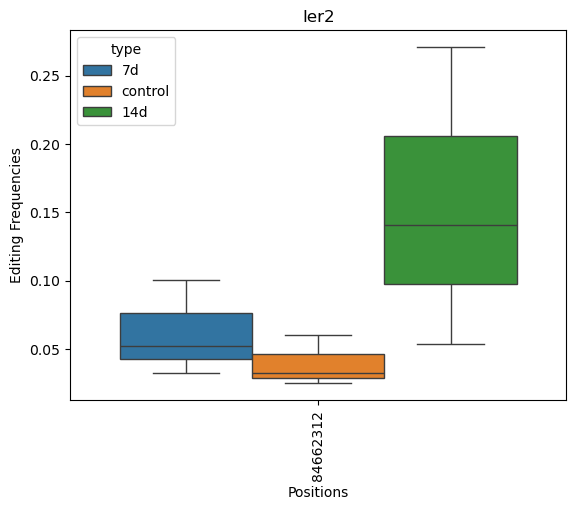

In [28]:
a2i.plot.boxplot(df, positions_to_plot=[fis.columns[-3]])

## Analize ALL region

In [30]:
df, df_a, df_g, region_list = a2i.editing.merge_files(meta)

/mnt/d/GoTx_Folder/src/a2ihelper/editing.py:73: UserWarning: Sorry, all dataset are empty or didn't has A-to-G editing.
  warnings.warn("Sorry, all dataset are empty or didn't has A-to-G editing.")
/mnt/d/GoTx_Folder/src/a2ihelper/editing.py:73: UserWarning: Sorry, all dataset are empty or didn't has A-to-G editing.
  warnings.warn("Sorry, all dataset are empty or didn't has A-to-G editing.")
/mnt/d/GoTx_Folder/src/a2ihelper/editing.py:73: UserWarning: Sorry, all dataset are empty or didn't has A-to-G editing.
  warnings.warn("Sorry, all dataset are empty or didn't has A-to-G editing.")
/mnt/d/GoTx_Folder/src/a2ihelper/editing.py:73: UserWarning: Sorry, all dataset are empty or didn't has A-to-G editing.
  warnings.warn("Sorry, all dataset are empty or didn't has A-to-G editing.")
/mnt/d/GoTx_Folder/src/a2ihelper/editing.py:73: UserWarning: Sorry, all dataset are empty or didn't has A-to-G editing.
  warnings.warn("Sorry, all dataset are empty or didn't has A-to-G editing.")
/mnt/d/GoT

In [31]:
df = a2i.editing.filter_positions(df, nan_filter=True, nan_filter_limit=1,
                                           zero_filter=False, zero_filter_limit=1,
                                           hundred_filter=True, hundred_filter_limit=1)

In [32]:
df

,69095470,69101024,69101526,69101535,69101549,69103136,69103190,69103644,69103934,69104063,...,84662274,84662312,84662355,84662465,84662532,84661540,84661986,84662431,region,type
X1247-ready.bam,13.333333,0.718133,0.696864,1.178451,0.191205,0.506329,0.424628,1.656315,98.871650,0.879121,...,99.962128,0.052425,99.851808,100.000000,99.935505,NaN,NaN,NaN,several,7d
X1249-ready.bam,5.000000,0.367840,0.861632,0.633528,0.273523,0.346260,0.766284,0.641437,99.678457,0.152439,...,99.979524,0.100650,99.830759,99.936245,99.928969,0.163666,0.016741,0.042868,several,7d
X36-ready.bam,NaN,NaN,0.258398,NaN,0.508475,0.413793,0.268456,2.500000,99.522388,0.848356,...,99.992270,0.032595,100.000000,99.947132,100.000000,0.047304,0.089183,0.160085,several,7d
X582-ready.bam,4.929577,0.793448,0.896739,1.020697,0.169837,0.516224,0.818640,1.338028,99.978778,0.613497,...,99.995363,0.060033,99.893928,99.968473,99.982100,0.065690,0.006786,0.023677,several,control
X679-ready.bam,1.081081,0.263745,0.694858,0.603348,0.288376,0.110803,0.969082,1.121718,99.738180,0.364868,...,99.994671,0.025263,99.877345,99.991049,99.945882,0.127065,0.010927,0.031352,several,control
X838-ready.bam,NaN,0.502513,1.789474,0.634921,0.350467,0.941915,0.355030,0.258732,99.891422,NaN,...,100.000000,0.271003,100.000000,99.573379,100.000000,NaN,NaN,0.175901,several,14d
X839-ready.bam,1.428571,NaN,NaN,0.525394,0.393314,0.796813,0.755940,0.987654,99.922780,0.649351,...,99.846449,0.054054,99.608764,100.000000,99.860335,0.426439,0.105485,0.407609,several,14d
X840-ready.bam,1.587302,0.108460,0.209205,1.048218,NaN,0.382166,0.339751,0.581395,99.714013,0.596125,...,99.906213,0.141066,99.864682,99.962784,99.898785,0.098232,0.030017,0.093721,several,14d
X868-ready.bam,NaN,0.749064,0.930752,1.154993,0.390795,NaN,NaN,3.045187,99.874451,0.489130,...,99.994500,0.032649,99.879158,99.979031,99.996647,0.193818,NaN,0.165693,several,control


## Statistics for frequency

### Anova tukey

In [33]:
df_pv = a2i.editing.anova_tukey_test(df, only_pvalue=True, pvalue_filter_limit_anova=1, pvalue_filter_limit_tukey=1, return_only_significant=True)
df_pv

coord,25757351,25758647,25770714,25774562,25778469,25778472,25787443,25787446,69103644,69103934,...,84662193,84662215,84662274,84662312,84662355,84662465,84662532,122150961,167689764,167689796
tests,,,,,,,,,,,,,,,,,,,,,
"(7d, 14d)",0.553663,0.507083,0.602975,0.5636,0.993729,0.657402,0.335815,0.846399,0.378345,0.141461,...,0.844251,0.273844,0.306593,0.277374,0.786165,0.588304,0.680285,0.534289,0.631382,0.783749
"(7d, control)",0.920325,0.425401,0.278544,0.891258,0.999953,0.994099,0.994065,0.852487,0.937416,0.124917,...,0.992594,0.948906,0.89461,0.911826,0.994101,0.985454,0.876986,0.681136,0.93307,0.788968
"(control, 14d)",0.772686,0.985266,0.77033,0.819927,0.994758,0.598895,0.378922,0.546475,0.250782,0.994785,...,0.89789,0.394718,0.174617,0.165646,0.84003,0.500347,0.41793,0.195689,0.828436,0.422401


### Kruskal Dunn

In [34]:
df_pv = a2i.editing.kruskal_dunn_test(df, only_pvalue=True, pvalue_filter_limit_kruskal=1, pvalue_filter_limit_dunn=1, return_only_significant=True)
df_pv

coord,25757351,25758647,25770714,25774562,25778469,25778472,25787443,25787446,69103644,69103934,...,84662193,84662215,84662274,84662312,84662355,84662465,84662532,122150961,167689764,167689796
tests,,,,,,,,,,,,,,,,,,,,,
"(7d, 14d)",0.456057,0.654721,0.550985,0.765594,0.765594,0.369091,0.154993,0.233038,0.10105,0.052632,...,1.0,0.369091,1.0,0.179712,1.0,1.0,0.549316,0.550985,0.456057,0.765594
"(7d, control)",0.765594,0.371093,0.10105,0.881497,0.881497,0.822334,0.881004,0.765594,0.765594,0.036888,...,1.0,0.822334,0.179712,0.654721,0.500545,0.500545,0.708225,0.136037,0.550985,0.296718
"(control, 14d)",0.296718,0.654721,0.296718,0.881497,0.881497,0.261556,0.203225,0.136037,0.052632,0.881497,...,1.0,0.500545,0.179712,0.073638,0.500545,0.500545,0.330541,0.036888,0.881497,0.456057


## Statistics for porprotions

### Pooling smaples/coordinates by G-test

In [35]:
a, g = a2i.editing.pool_positions(df_a[df.columns],df_g[df.columns])

In [36]:
a

,69105526,84662169,84662274,84662312,region,type
type,,,,,,
14d,4.0,4.0,12.0,9692.0,several,14d
7d,9.0,42.0,6.0,23932.0,several,7d
control,32.0,156.0,7.0,99135.0,several,control


In [37]:
g

,69105526,84662169,84662274,84662312,region,type
type,,,,,,
14d,3658.0,8909.0,13061.0,14.0,several,14d
7d,4109.0,21479.0,32863.0,16.0,several,7d
control,13827.0,86280.0,135199.0,39.0,several,control


In [38]:
chi = a2i.editing.chi2_test(a,g,only_pvalue=True,pvalue_filter_limit=.5)
chi

,69105526,84662169,84662274,84662312,region,type
pvalue,0.294574,0.001563,2.372066e-08,0.000568,several,14d_vs_7d_vs_control


In [39]:
chi.columns

Index([69105526, 84662169, 84662274, 84662312, 'region', 'type'], dtype='object')

In [45]:
a.loc[a.type!='control',chi.columns]

,69105526,84662169,84662274,84662312,region,type
type,,,,,,
14d,4.0,4.0,12.0,9692.0,several,14d
7d,9.0,42.0,6.0,23932.0,several,7d


In [46]:
fis = a2i.editing.fisher_test(a.loc[a.type!='control',:],g.loc[g.type!='control',:],only_pvalue=True,pvalue_filter_limit=.5)
fis

,69105526,84662169,84662274,84662312,region,type
pvalue,0.277194,0.001046,0.000849,0.041968,several,14d_vs_7d


In [47]:
or_ = a2i.editing.odds_r(a.loc[a.type!='control',fis.columns], g.loc[g.type!='control',fis.columns])
or_

,69105526,84662169,84662274,84662312,region,type
odds_ratio,0.499283,0.22962,5.032028,0.462847,several,14d_vs_7d


<Axes: title={'center': '14d_vs_7d (several)'}, xlabel='Positions', ylabel='-log10(pvalue)'>

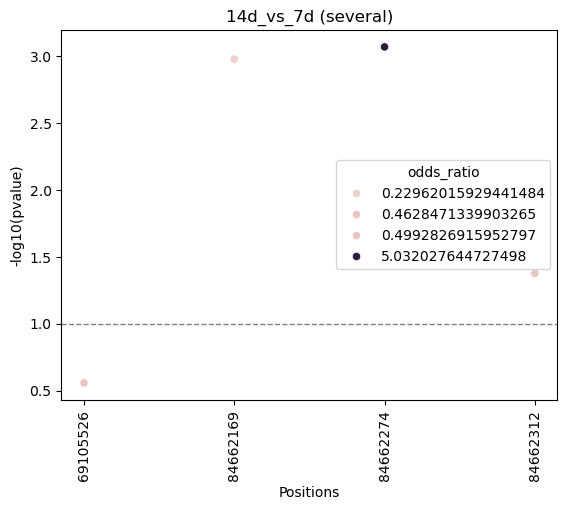

In [48]:
a2i.plot.manhattanplot(or_, fis, p_value_line=0.1)

<Axes: title={'center': 'several'}, xlabel='Positions', ylabel='Editing Frequencies'>

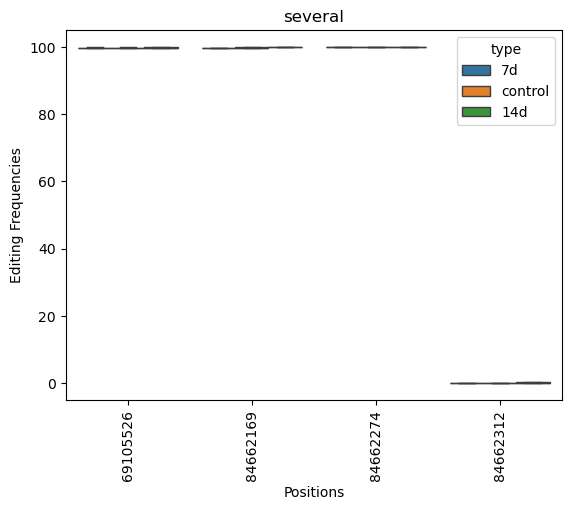

In [49]:
a2i.plot.boxplot(df, positions_to_plot=fis.columns[:-2].tolist())

In [ ]:
a, g = a2i.editing.pool_positions(df_a[df.columns],df_g[df.columns])

In [ ]:
a

In [ ]:
g

In [ ]:
genes_coor = dict()
for g in region_list.keys():
    genes_coor[g] = []
    for c in a.columns[:-2]:
        if c in region_list[g]:
            genes_coor[g].append(c)

In [ ]:
genes_coor

In [ ]:
df_list = []
df_a_list = []
df_g_list = []
region_list = []

for r in meta.iloc[:,2].unique():
    try:
        df, df_a, df_g = a2i.editing.merge_files_one_region(meta[meta.iloc[:,2]==r])
        df_list.append(df.iloc[:,:-2])
        df_a_list.append(df_a.iloc[:,:-2])
        df_g_list.append(df_g.iloc[:,:-2])
        region_list.append(r)
    except:
        pass

df = pd.concat(df_list, axis=1).merge(meta.iloc[:,[1,3]].drop_duplicates().set_index(meta.columns[1]), left_index=True, right_index=True)
df_a = pd.concat(df_a_list, axis=1).merge(meta.iloc[:,[1,3]].drop_duplicates().set_index(meta.columns[1]), left_index=True, right_index=True)
df_g = pd.concat(df_g_list, axis=1).merge(meta.iloc[:,[1,3]].drop_duplicates().set_index(meta.columns[1]), left_index=True, right_index=True)

In [ ]:
v = ['several' for r in range(df.shape[0])]
i = len(df.columns) - 1
df.insert( i, 'region', v)

In [ ]:
df

In [ ]:
df, df_a, df_g = a2i.editing.merge_files(meta[meta.region=='Notch1'])

In [ ]:
df

In [ ]:
{value:key for key,value in gene_coord.items()}['chr16:55811375-55838899']

# Borges Data

In [ ]:
# genes = ['B2M', 'APOL1', 'CD74']
# genes = ['B2m', 'Apol10a', 'Cd74','Ndnf','Pcp4','Pvalb','Notch1',]
genes = ['Clec1a','Clec2g', 'Clec4a4', 'Clec4e', 'Csf3r', 'Cyp4f16',
         'Dscam', 'Gm8774', 'H2bc27', 'Hap1', 'Hdc', 'Hebp1','Ier2', 'Igkv6-23',
         'Kdm6b', 'Klri1', 'Marchf3', 'Mthfs', 'Ncr1','Notch1', 'Per1','Ptchd1',
         'Rnf144a', 'Sgms2', 'Stra6l', 'Xylt1','I830077J02Rik', 'Tlr1', 'Axl',
         'C1qc','Cebpb', 'Il1b', 'Nfkbiz','B2m', 'Apol10a', 'Cd74','Ndnf','Pcp4','Pvalb']
path_ref_annotation='/mnt/e/reference_files/gencode.vM10.annotation.gtf'#gencode.v44.annotation.gtf.gz'

In [ ]:
# t1 = time.time()
# gene_coord = a2i.call_reditools2.get_genes_positions(genes, path_ref_annotation, gzip_file=False)
# gene_coord
# print(np.round( (time.time()-t1), 6 ), np.round( (time.time()-t1)/60, 2 ))

In [ ]:
gene_coord ={'Notch1': 'chr2:26457903-26516663',
 'B2m': 'chr2:122147686-122153083',
 'Hdc': 'chr2:126593667-126619299',
 'Il1b': 'chr2:129364570-129371139',
 'Cebpb': 'chr2:167688915-167690418',
 'I830077J02Rik': 'chr3:105924358-105932664',
 'Sgms2': 'chr3:131318985-131491411',
 'Stra6l': 'chr4:45848664-45887008',
 'Csf3r': 'chr4:126024550-126044440',
 'C1qc': 'chr4:136889804-136893065',
 'Tlr1': 'chr5:64924679-64933563',
 'Ndnf': 'chr6:65671590-65712326',
 'Igkv6-23': 'chr6:70260409-70260955',
 'Clec4a4': 'chr6:122990367-123024105',
 'Clec4e': 'chr6:123281789-123289870',
 'Gm8774': 'chr6:128883852-128884543',
 'Clec2g': 'chr6:128934381-128984707',
 'Clec1a': 'chr6:129424772-129452000',
 'Klri1': 'chr6:129697218-129717132',
 'Hebp1': 'chr6:135137522-135198022',
 'Ncr1': 'chr7:4337724-4345164',
 'Axl': 'chr7:25757273-25788705',
 'Xylt1': 'chr7:117380979-117673580',
 'Ier2': 'chr8:84661331-84662852',
 'Mthfs': 'chr9:89210676-89377713',
 'Per1': 'chr11:69095217-69109960',
 'Kdm6b': 'chr11:69398508-69413675',
 'Hap1': 'chr11:100347327-100356128',
 'Rnf144a': 'chr12:26306797-26415256',
 'Apol10a': 'chr15:77477047-77491069',
 'Pvalb': 'chr15:78191114-78206400',
 'Nfkbiz': 'chr16:55811375-55838899',
 'Pcp4': 'chr16:96467606-96525793',
 'Dscam': 'chr16:96592079-97170752',
 'Cyp4f16': 'chr17:32536558-32551798',
 'Cd74': 'chr18:60803848-60812646',
 'Ptchd1': 'chrX:155573455-155623814'}

In [ ]:
genes_positions = gene_coord.values()
in_bam_file_list = ['/mnt/e/Borges_Project_002/bams/'+f.replace('.bai','') for f in os.listdir('/mnt/e/Borges_Project_002/bams/') if f.endswith('bai')]#'/mnt/e/Borges_Project_002/bams/Allo_EKO_3_S3Aligned.sortedByCoord.out.bam' 
path_out_res = '/mnt/d/GoTx_Folder/tests/res/'
ref_genome_file = '/mnt/e/reference_files/GRCm38.p4.genome.fa'#GRCh38.p14.genome.fa'
path_reditools = '/mnt/d/reditools2.0/src/cineca/'
reditools_options = '--strict'

In [ ]:
# t1 = time.time()
# for in_bam_file in in_bam_file_list:
#     a2i.call_reditools2.run_per_gene_position_list(genes_positions, in_bam_file, path_out_res, ref_genome_file, path_reditools, reditools_options='', n_jobs=10)
# print(np.round( (time.time()-t1), 6 ),'min', np.round( (time.time()-t1)/60, 2 ),'s')

In [ ]:
path = '/mnt/d/GoTx_Folder/tests/res/'
meta = pd.DataFrame(os.listdir(path))
meta.columns = ['file_name']
meta[['sample_name','condition']] = meta['file_name'].str.replace('Aligned.sortedByCoord.out.bam','').str.split('_', expand=True).iloc[:,[3,1]]
meta['file_name'] = path+meta['file_name']
meta['coord'] = meta['file_name'].str.replace('Aligned.sortedByCoord.out.bam','').str.split('_', expand=True).iloc[:,[5,6]].agg(':'.join, axis=1)
meta['coord'] = meta['coord'] + '-' +meta['file_name'].str.replace('Aligned.sortedByCoord.out.bam','').str.split('_', expand=True).iloc[:,7]
meta['region'] = meta['coord'].map({value:key for key,value in gene_coord.items()})
meta = meta[['file_name', 'sample_name', 'region', 'condition', 'coord']]
meta.head()

In [ ]:
df, df_a, df_g = a2i.editing.merge_files(meta[meta.region=='Clec1a'])

In [ ]:
df_filtered = a2i.editing.filter_positions(df.copy(), nan_filter=True, nan_filter_limit=2,
                                           zero_filter=False, zero_filter_limit=2,
                                           hundred_filter=True, hundred_filter_limit=1)

In [ ]:
df_filtered = df_filtered.fillna(0)#.columns[np.where(df_filtered.drop('Region', axis=1).sum()<300)]

In [ ]:
df_filtered.columns

In [ ]:
f = df[df_filtered.columns]

In [ ]:
a, g = a2i.editing.pool_positions(df_a[df_filtered.columns],df_g[df_filtered.columns])

In [ ]:
from scipy.stats.contingency import odds_ratio
res = odds_ratio([a[129439247].astype(int).values, g[129439247].astype(int).values])
res.statistic

In [ ]:
chi = a2i.editing.chi2_test(a,g,only_pvalue=True,pvalue_filter_limit=.1)
chi

In [ ]:
chi = a2i.editing.chi2_test(a,g,only_pvalue=True,pvalue_filter_limit=.1)
chi

fis = a2i.editing.fisher_test(a,g,only_pvalue=True,pvalue_filter_limit=.1)

or_ = a2i.editing.odds_r(a[chi.columns], g[chi.columns])
or_

In [ ]:
a2i.plot.manhattanplot(or_, chi)

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
def manhattanplot(df_or, df_pv, positions_to_plot:list = None, ax=None, figsize:tuple = None):
    aux_m = pd.concat([df_or,df_pv]).iloc[:,:-2].T.reset_index()
    aux_m['-log10(pvalue)'] = -np.log10(aux_m['pvalue'])
    if ax == None:
        if figsize:
            f, ax = plt.subplots()
        else:
            f, ax = plt.subplots(figsize=figsize)

    x = 'index'
    y = '-log10(pvalue)'
    hue = 'odds_ratio'

    sns.scatterplot(x=x, y=y, hue=hue, data=aux_m, ax=ax)
    ax.set_xlabel('Positions')
    ax.set_xticks(ax.get_xticks())
    ax.set_xticklabels(ax.get_xticks().astype(int), rotation=90)
    ax.set_ylabel('-log10(pvalue)')
    ax.set_title(','.join(df_or.iloc[:,-1].unique())+' ('+','.join(df_or.iloc[:,-2].unique())+')')

    return ax

In [ ]:
ax = manhattanplot(or_, chi)

In [ ]:
ax.get_xticks().astype(int)

In [ ]:
ax.get_xticklabels()

In [ ]:
a2i.editing.fisher_test(a,g,only_pvalue=True)

In [ ]:
h = pd.concat([a2i.editing.odds_r(a[[129436640, 129439247, 129439249, 129449617, 'region', 'condition']], g[[129436640, 129439247, 129439249, 129449617, 'region', 'condition']]), a2i.editing.chi2_test(a,g,only_pvalue=True)])

In [ ]:
h

In [ ]:
h.iloc[:,:-2].T.reset_index()

In [ ]:
a2i.editing.kruskal_dunn_test(f,only_pvalue=True, pvalue_filter_limit_kruskal=.9, pvalue_filter_limit_dunn=.2)

In [ ]:
a2i.plot.boxplot(f, positions_to_plot=a2i.editing.kruskal_dunn_test(f,only_pvalue=True, pvalue_filter_limit_kruskal=.9, pvalue_filter_limit_dunn=.2)[1])

In [ ]:
f.columns[:-2].tolist()==None

In [ ]:
isinstance(f.columns[:-2], np.ndarray)

In [ ]:
f.columns[:-2]

In [ ]:
a2i.editing.anova_tukey_test(f)

In [ ]:
f[[129429669, 129442303]+[df.columns[-1]]].melt(id_vars=f.columns[-1])

In [ ]:
    sns.boxplot(y='value', x='variable', hue=f.columns[-1], data=f.drop(f.columns[-2], axis=1).melt(id_vars=f.columns[-1]))

In [ ]:
f.drop(f.columns[-2], axis=1)[[129429669, 129442303]+[df.columns[-1]]].melt(id_vars=f.columns[-1])

In [ ]:
def chi2_test(df_a, df_b, only_pvalue=True, return_only_significant=True, pvalue_filter_limit=0.05):
    aux_pv = []
    for c in df_a.columns[:-2]:
        if only_pvalue:
            aux_pv.append(chi2_contingency([a[c].values, g[c].values], lambda_="log-likelihood").pvalue)
        else:
            aux_pv.append(chi2_contingency([a[c].values, g[c].values], lambda_="log-likelihood"))
            
    if only_pvalue:
        chi2_res = pd.DataFrame(aux_pv, index=df_a.columns[:-2], columns=['pvalue'])     
    else:
        chi2_res = pd.DataFrame(aux_pv, index=df_a.columns[:-2], columns=['statistic','pvalue','dof','expected_freq'])

    if return_only_significant:
        chi2_res = chi2_res[chi2_res.pvalue<=pvalue_filter_limit].T
        
    chi2_res['region'] = df_a.iloc[0,-2]
    chi2_res['condition'] = '_vs_'.join(df_a.condition.unique())
    return chi2_res

def fisher_test(df_a, df_b, only_pvalue=True, return_only_significant=True, pvalue_filter_limit=0.05):
    aux_pv = []
    for c in df_a.columns[:-2]:
        if only_pvalue:
            aux_pv.append(fisher_exact([a[c].values, g[c].values], alternative='two-sided').pvalue)
        else:
            aux_pv.append(fisher_exact([a[c].values, g[c].values], alternative='two-sided'))

    if only_pvalue:
        fisher_res = pd.DataFrame(aux_pv, index=df_a.columns[:-2], columns=['pvalue'])
    else:
        fisher_res = pd.DataFrame(aux_pv, index=df_a.columns[:-2], columns=['statistic','pvalue'])

    if return_only_significant:
        fisher_res = fisher_res[fisher_res.pvalue<=pvalue_filter_limit].T

    fisher_res['region'] = df_a.iloc[0,-2]
    fisher_res['condition'] = '_vs_'.join(df_a.condition.unique())
    return fisher_res

def anova_tukey_test(df, only_pvalue=True, return_only_significant=True, pvalue_filter_limit=0.05):
    """
    Anova with post-hoc test for more than two conditions.

    Parameters
    ----------
    df: df
        pandas DataFrame of editing frequency. Rows are samples and columns are coordinates. The DataFrame must be like merge_files output. The last two columns must be region and conditions.

    Returns
    -------
    DataFrame
        returns p-values for Anova post-hoc test.
    """
    if df.iloc[:,:-2].empty:
        print('The input is an empty DataFrame. In this case the function returns empty list []')
        return False
    res = []
    pos = []
    index_comb = []
    cols_tukey = list(itertools.combinations( df.iloc[:,-1].unique(), 2) )
    conditions = df.iloc[:,-1].unique()
    for c in df.columns[:-2]:
        data_by_condition = []
        for cond in conditions:
            data_by_condition.append(df[df.iloc[:,-1]==cond][c].values)
        aux_aov = f_oneway(*data_by_condition)
        if aux_aov.pvalue<=0.05:
            aux_tukey = tukey_hsd(*data_by_condition)
            if return_only_significant and ((aux_tukey.pvalue <= pvalue_filter_limit).astype(int).sum() > 0):
                for cond_comb in itertools.combinations(range(len(conditions)),2):
                    if only_pvalue:
                        res.append(aux_tukey.pvalue[cond_comb])
                        pos.append(c)
                        index_comb.append(cond_comb)
                    else:
                        res.append(aux_tukey)
                        pos.append(c)
                        index_comb.append(cond_comb)
            elif not return_only_significant:
                for cond_comb in itertools.combinations(range(len(conditions)),2):
                    if only_pvalue:
                        res.append(aux_tukey.pvalue[cond_comb])
                        pos.append(c)
                        index_comb.append(cond_comb)
                    else:
                        res.append(aux_tukey)
                        pos.append(c)
                        index_comb.append(cond_comb)
                        
    return res,pos,index_comb

In [ ]:
a2i.editing.anova_tukey_test(f)

In [ ]:
kruskal(f[f['condition']=='EKO'][129439201], f[f['condition']=='WT'][129439201])

In [ ]:
sp.posthoc_dunn(a=f, val_col=129439201, group_col='condition')

In [ ]:
a2i.editing.kruskal_dunn_test(f, return_only_significant=True, pvalue_filter_limit_kruskal = 0.2, pvalue_filter_limit_dunn= 0.05)

In [ ]:
aux_dunn = sp.posthoc_dunn(a=f, val_col=129442303, group_col='condition')
aux_dunn

In [ ]:
(aux_dunn<=0.2).astype(int).sum().sum()>0

In [ ]:
cond_comb = list(itertools.combinations(sp.posthoc_dunn(a=f, val_col=129442303, group_col='condition').columns,2))
cond_comb

In [ ]:
aux_dunn.loc[cond_comb[0]]

In [ ]:
f.melt(id_vars=['condition','region'])

In [ ]:
f_oneway(f[f['condition']=='EKO'][129442303], f[f['condition']=='WT'][129442303])

In [ ]:
print(tukey_hsd(f[f['condition']=='EKO'][129429669], f[f['condition']=='WT'][129429669]))

In [ ]:
print(tukey_hsd(f[f['condition']=='EKO'][129442303], f[f['condition']=='WT'][129442303]))

In [ ]:
return_only_significant = True
pvalue_filter_limit = 0.05
only_pvalue = True

res = []
pos = []
cols_tukey = list(itertools.combinations( f.iloc[:,-1].unique(), 2) )
conditions = f.iloc[:,-1].unique()
for c in f.columns[:-2]:
    data_by_condition = []
    for cond in conditions:
        data_by_condition.append(f[f.iloc[:,-1]==cond][c].values)
    aux_aov = f_oneway(*data_by_condition)
    if aux_aov.pvalue<=0.05:
        aux_tukey = tukey_hsd(*data_by_condition)
        if return_only_significant and ((aux_tukey.pvalue <= pvalue_filter_limit).astype(int).sum() > 0):
            for cond_comb in itertools.combinations(range(len(conditions)),2):
                if only_pvalue:
                    res.append(aux_tukey.pvalue[cond_comb])\
                else:
                    res.append(aux_tukey)
        elif not return_only_significant:
            for cond_comb in itertools.combinations(range(len(conditions)),2):
                if only_pvalue:
                    res.append(aux_tukey.pvalue[cond_comb])
                else:
                    res.append(aux_tukey)

In [ ]:
res

In [ ]:
# for c in f.columns[:-2]:
c =  f.columns[2]
data_by_condition = []
# aux_aov = []
for cond in f.iloc[:,-1].unique():
    data_by_condition.append(f[f.iloc[:,-1]==cond][c].values)
aux_aov = tukey_hsd(*data_by_condition)
print(aux_aov)
    # break
    # if not aux_aov[aux_aov['p-unc']<=0.1].empty:
    #     aux_tukey = sp.posthoc_tukey(f, val_col=c, group_col=df.columns[-1])

In [ ]:
list(itertools.combinations(range(len(df.iloc[:,-1].unique())),2))

In [ ]:
aux_aov.pvalue[(0, 1)]

In [ ]:
aux_aov.confidence_interval(confidence_level=0.95).low

In [ ]:
aux_aov.confidence_interval(confidence_level=0.95).high

In [ ]:
pd.DataFrame(a2i.editing.chi2_test(a,g,only_pvalue=True))

In [ ]:
pd.DataFrame(a2i.editing.fisher_test(a,g,only_pvalue=True))

In [ ]:
# a2i.editing.
# anova_tukey_test(f)
cols_tukey = list(itertools.combinations( df.iloc[:,-1].unique(), 2) )
cols_tukey

In [ ]:
aux_aov = pg.anova(dv=df.columns[-1], between=df.columns[-1], data=df, detailed=False)

In [ ]:
f[f.iloc[:,-1]=='EKO'][129424893].values

In [ ]:
dict(list(f.groupby('condition')[129425070])).values().values

In [ ]:
dict(list(f.groupby('condition')))

In [ ]:
an = (f[f['condition']=='EKO'][129439638], f[f['condition']=='WT'][129439477])

In [ ]:
f_oneway(*an)

In [ ]:
f_oneway(f[f['condition']=='EKO'][129439638], f[f['condition']=='WT'][129439477])

In [ ]:
f[f.dropna(axis=1).iloc[:,:-2].sum().sort_values().head(20).index]

In [ ]:
a2i.editing.independency_gtest(a,g, only_pvalue=True)

In [ ]:
a2i.editing.independency_gtest(df_a[df_filtered.columns],df_g[df_filtered.columns], only_pvalue=False).dropna(axis=1)

In [ ]:
aux_a, aux_g = a2i.editing.filter_gtest(df_a[df_filtered.columns],df_g[df_filtered.columns])

In [ ]:
'_vs_'.join(df_a.condition.unique())

In [ ]:
aux_g

In [ ]:
df_g

In [ ]:
df_a

In [ ]:
a = df_a.loc[df_a.iloc[:,-1]=='EKO', 129424774 ].values
a

In [ ]:
a>0

In [ ]:
a.sum()

In [ ]:
g = df_g.loc[df_g.iloc[:,-1]=='EKO', 129424774 ].values
g

In [ ]:
from scipy.stats import chi2_contingency, fisher_exact

In [ ]:
chi2_contingency(np.array([[0,1],[1,0]]), lambda_="log-likelihood")

In [ ]:
df.loc[:,129424774]

In [ ]:
df_t = pd.read_csv( '/mnt/d/GoTx_Folder/tests/res/Allo_EKO_3_S3Aligned.sortedByCoord.out.bam_chr15_77477047_77491069_RES.tsv', sep = '\t' )

In [ ]:
df_t = df_t[df_t['Coverage-q30']>=10]
df_t = df_t[df_t.Reference.isin(['A','T'])]
df_t = df_t[(df_t.AllSubs.str.contains('AG')) | (df_t.AllSubs.str.contains('TC'))]
df_t[['count_A','count_C','count_G','count_T']] = df_t['BaseCount[A,C,G,T]'].str.replace('[','',regex=False).str.replace(']','', regex=False).str.split(',',expand=True).apply(pd.to_numeric)
df_t

In [ ]:
np.where((df_t['Reference']=='A'), df_t.count_A, df_t.count_T)

In [ ]:
meta[meta.iloc[:,0] == file].iloc[:,1].values[0]

In [ ]:
df_a[[77480236]]

In [ ]:
df_g[[77480236]]

In [ ]:
df_filtered#[[45874366,45875071]]

In [ ]:
df_g

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
# def merge_files(meta):
"""
Merge all RES files (output of REDItools2) in three pandas DataFrames of frequency or count per position.
The first DataFrame is the frequency of editing (A-G or T-C). The Second DataFrame is the count of A (or T) per position. And the last one is the count of G (or C) per postion.

Parameters
----------
meta: df
    A pandas DataFrame with metadata information. The first four columns are mandatory
        First: Full path file names of REDItools2 results tables
        Second: Samples names
        Third: region (gene symbol)
        Fourth: condition

Returns
-------
tuple
    a tuple of three pandas DataFrames (df, df_a, df_g).
    df: frequency of editing
    df_a: counts of A or T
    df_g: counts of G or C
"""
meta = meta[meta.Region=='Apol10a']
FILES = meta.iloc[:,0].unique()
# region = meta.iloc[:,2].values[0]
df_list_a = []
df_list_g = []
samples = []
for file in FILES:
    df = pd.read_csv( file, sep = '\t' )
    samples.append(meta[meta.iloc[:,0] == file].iloc[:,1].values[0])
    if df.empty:
        df_list_a.append( pd.DataFrame({'Position':[-1],
                                        samples[-1]:[np.nan]}).set_index('Position') )
        df_list_g.append( pd.DataFrame({'Position':[-1],
                                        samples[-1]:[np.nan]}).set_index('Position') )
    else:
        df = df[df['Coverage-q30']>=10]
        df = df[df.Reference.isin(['A','T'])]
        df = df[(df.AllSubs.str.contains('AG')) | (df.AllSubs.str.contains('CT'))]
        if df.empty:
            df_list_a.append( pd.DataFrame({'Position':[-1], samples[-1]:[np.nan]}).set_index('Position') )
            df_list_g.append( pd.DataFrame({'Position':[-1], samples[-1]:[np.nan]}).set_index('Position') )
        else:
            df[['count_A','count_C','count_G','count_T']] = df['BaseCount[A,C,G,T]'].str.replace('[','',regex=False).str.replace(']','', regex=False).str.split(',',expand=True).apply(pd.to_numeric)

            df[samples[-1]] = np.where((df['Reference']=='A'), df.count_A, df.count_T)
            df_list_a.append(df[['Position',samples[-1]]].set_index('Position'))

            df[samples[-1]] = np.where((df['Reference']=='T'), df.count_G, df.count_C)
            df_list_g.append(df[['Position',samples[-1]]].set_index('Position'))
# Analysis by gene
df_a = pd.concat(df_list_a, axis=1)
df_g = pd.concat(df_list_g, axis=1)

if (-1 in df_a.index):
    df_a.drop(-1, axis=0, inplace=True)
    df_g.drop(-1, axis=0, inplace=True)

if df_a.empty:
    # print('Region', region , 'has not filterd edited site.')
    # return df_a.T
    pass
else:
    df = pd.DataFrame(100*df_g.values / (df_a.values+df_g.values), columns=samples, index=df_a.index).T
    df = df.merge(meta.iloc[:,[1,3]].drop_duplicates().set_index(meta.columns[1]), left_index=True, right_index=True)

    df_a = df_a.T.merge(meta.iloc[:,[1,3]].drop_duplicates().set_index(meta.columns[1]), left_index=True, right_index=True)
    df_g = df_g.T.merge(meta.iloc[:,[1,3]].drop_duplicates().set_index(meta.columns[1]), left_index=True, right_index=True)
    # return df, df_a, df_g

In [ ]:
df_a

In [ ]:
pd.concat(df_list_a, axis=1)

In [ ]:
def get_genes_positions(genes, path_ref_annotation, gzip_file=True):
    genes_positions_list = []
    if genes:
        if gzip_file:
            for g in genes:
                with gzip.open(path_ref_annotation,'r') as f_gtf:
                    for line in f_gtf:
                        if not line.startswith('#'.encode()):
                            l = line.decode().split('\t')
                            dict_g = { i.split(' ')[0]:i.split(' ')[1] for i in [j.strip() for j in l[-1].replace(';\n','').replace('"','').split(';')] }
                            if (l[2]=='gene') and (dict_g['gene_name']==g):
                                g_list.append(l[0]+':'+l[3]+'-'+l[4])
        else:
            for g in genes:
                with open(path_ref_annotation,'r') as f_gtf:
                    for line in f_gtf:
                        if not line.startswith('#'):
                            l = line.split('\t')
                            dict_g = { i.split(' ')[0]:i.split(' ')[1] for i in [j.strip() for j in l[-1].replace(';\n','').replace('"','').split(';')] }
                            if (l[2]=='gene') and (dict_g['gene_name']==g):
                                genes_positions_list.append(l[0]+':'+l[3]+'-'+l[4])

    if not genes_positions_list:
        warnings.warn('*Returning empty list. Positions of genes were not found in the '+ path_ref_annotation+'. Please verify genes names or gtf file.')

    return genes_positions_list

In [ ]:
g_list = get_genes_positions(genes, path_ref_annotation, gzip_file=False)

In [ ]:
print(g_list)

In [ ]:
genes_positions = ['chr2:122147686-122153083', 'chr18:60803848-60812646', 'chr6:65671590-65712326', 'chr16:96467606-96525793', 'chr15:78191114-78206400']
in_bam_file = '/mnt/e/Borges_Project_002/bams/Allo_EKO_3_S3Aligned.sortedByCoord.out.bam' 
path_out_res = '/mnt/d/GoTx_Folder/tests/'
ref_genome_file = '/mnt/e/reference_files/GRCm38.p4.genome.fa'#GRCh38.p14.genome.fa'
path_reditools = '/mnt/d/reditools2.0/src/cineca/'
reditools_options = '--strict'

In [ ]:
def run_per_gene_position(gene_position: str, in_bam_file: str, path_out_res: str, ref_genome_file: str, path_reditools: str, reditools_options: str) -> list:
    out_file = os.path.join( path_out_res, os.path.basename(in_bam_file)+'_'+gene_position.replace(':','_').replace('-','_')+'_RES.tsv' )
    cmd_list = ['python', 'reditools.py', '-f', in_bam_file, '-r', ref_genome_file, '-o', out_file, '-g', gene_position]
    if reditools_options:
        cmd_list += reditools_options.split(' ')
    subprocess.call(cmd_list, cwd=path_reditools, stdout=subprocess.PIPE)

def run_per_gene_position_list(genes_positions: list, in_bam_file: str, path_out_res: str, ref_genome_file: str, path_reditools: str, reditools_options: str, n_jobs=4):
    arguments_list = zip(genes_positions, itertools.repeat(in_bam_file), itertools.repeat(path_out_res), itertools.repeat(ref_genome_file), itertools.repeat(path_reditools), itertools.repeat(reditools_options))
    with Pool(processes=n_jobs) as p:
        p.starmap(run_per_gene_position, arguments_list)

In [ ]:
run_per_genes(genes_positions, in_bam_file, path_out_res, ref_genome_file, path_reditools, reditools_options='--strict', n_jobs=4)

In [ ]:
import pandas as pd

In [ ]:
type(pd.DataFrame([1,2,3]))

In [ ]:
os.path.basename('/mnt/d/rna_editing/bams/X36-ready.bam')

In [ ]:
itertools.repeat(g_list)

In [ ]:
list(zip(g_list, itertools.repeat(path_ref_annotation)))#, repeat(verboseFlag))

In [ ]:
{ i.split(' ')[0]:i.split(' ')[1] for i in [j.strip() for j in l[-1].replace(';\n','').replace('"','').split(';')] }['gene_name']

In [ ]:
g_list += '--strict -D hhh'.split(' ')

In [ ]:
g_list

In [ ]:
zip(genes_position, itertools.repeat(in_bam_file), itertools.repeat(path_out_res), itertools.repeat(ref_genome_file), itertools.repeat(path_reditools), itertools.repeat(reditools_options))